In [19]:
import itertools
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [20]:
print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [21]:
!wget -O data_collision.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-08-21 02:56:39--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘data_collision.csv’

100%[======================================>] 73,917,638  34.4MB/s   in 2.0s   

2020-08-21 02:56:41 (34.4 MB/s) - ‘data_collision.csv’ saved [73917638/73917638]



In [22]:
df = pd.read_csv('data_collision.csv')
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [23]:
df.shape

(194673, 38)

In [24]:
df.dropna(subset=["ROADCOND"], axis=0,inplace=True)
df.dropna(subset=["WEATHER"], axis=0,inplace=True)
df.dropna(subset=["LIGHTCOND"], axis=0,inplace=True)

In [25]:
df.shape

(189337, 38)

In [40]:
df_test = df[['WEATHER','ROADCOND','LIGHTCOND']]
df_test

,WEATHER,ROADCOND,LIGHTCOND
0,Overcast,Wet,Daylight
1,Raining,Wet,Dark - Street Lights On
2,Overcast,Dry,Daylight
3,Clear,Dry,Daylight
4,Raining,Wet,Daylight
5,Clear,Dry,Daylight
6,Raining,Wet,Daylight
7,Clear,Dry,Daylight
8,Clear,Dry,Daylight
9,Clear,Dry,Daylight


In [43]:
df_weather_counts = df['WEATHER'].value_counts().to_frame()
df_weather_counts.rename(columns = {'WEATHER':'value_counts'},inplace=True)
df_weather_counts

,value_counts
Clear,111008
Raining,33117
Overcast,27681
Unknown,15039
Snowing,901
Other,824
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,55
Severe Crosswind,25


AttributeError: module 'matplotlib.pyplot' has no attribute 'radius'

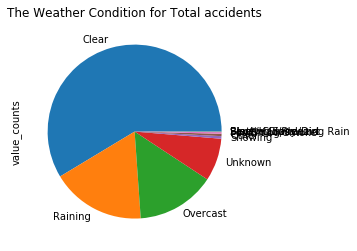

In [51]:
df_weather_counts['value_counts'].plot(kind = 'pie')

plt.title('The Weather Condition for Total accidents')

plt.show()

In [46]:
df_ROADCOND_counts = df['ROADCOND'].value_counts().to_frame()
df_ROADCOND_counts.rename(columns = {'ROADCOND':'value_counts'},inplace=True)
df_ROADCOND_counts

,value_counts
Dry,124300
Wet,47417
Unknown,15031
Ice,1206
Snow/Slush,999
Other,131
Standing Water,115
Sand/Mud/Dirt,74
Oil,64


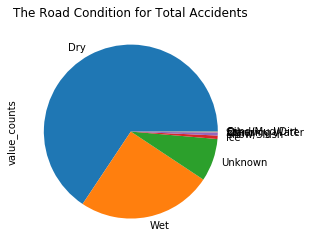

In [48]:
df_ROADCOND_counts['value_counts'].plot(kind = 'pie')

plt.title('The Road Condition for Total Accidents')

plt.show()

In [49]:
df_LIGHTCOND_counts = df['LIGHTCOND'].value_counts().to_frame()
df_LIGHTCOND_counts.rename(columns = {'LIGHTCOND':'value_counts'},inplace=True)
df_LIGHTCOND_counts

,value_counts
Daylight,116077
Dark - Street Lights On,48440
Unknown,13456
Dusk,5889
Dawn,2502
Dark - No Street Lights,1535
Dark - Street Lights Off,1192
Other,235
Dark - Unknown Lighting,11


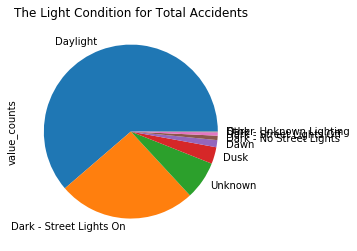

In [53]:
df_LIGHTCOND_counts['value_counts'].plot(kind = 'pie')

plt.title('The Light Condition for Total Accidents')

plt.show()